### Wykrywanie brakujących danych 

In [1]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
csv_data_nan = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0
,,,'''
df_nan = pd.read_csv(StringIO(csv_data_nan))
df_nan

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN
3,NaN,NaN,NaN,NaN


In [8]:
# warca ile jest brakujących danych w poszczególnych kolumnach 
df.isnull().sum(axis=0) # po kolumnie

A    0
B    0
C    1
D    1
dtype: int64

In [12]:
df.isnull().sum(axis=1) # po wierszu

0    0
1    1
2    1
dtype: int64

zaleca sie podawanie danych do algorytmu w formie tablic Numpy, jedna Pandas tez jest obsługiwany 

In [15]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Usuwanie brakujących wartości z danych jeśli mamy wystarczająco dużo danych uczących 
- Cechy to kolumny 
- Przykłady uczace to wiersze 
#### Najprostszy sposób to usunięcie kolumn i wierszy gdzie brakuje danych 

In [3]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
df_nan

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN
3,NaN,NaN,NaN,NaN


In [6]:
#usuwa wiersze w których wsztskie kolumny maja wartość nan
df_nan.dropna(how="all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# usuwa wiersze w którch znajduje sie mniej niż 4 rezcywiste warości 
df_nan.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# usuwa wartości tylko w okreslonych kolumnach
df.dropna(subset=["C"])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Wstawianie Danych 
#### Kiedy dane są zbyt cenne by je usunąć stosujemy interpolacje czyli szacowanie brakujących danych na podstawie danych uczących 
Imputacja z użyciem średniej - zastepowanie brakujących danych średnia z całej kolumny 

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

In [10]:
imr = SimpleImputer(missing_values=np.nan, strategy="mean") #opcjonalinie median, most_frequent
imr = imr.fit(df_nan)
imputed_data = imr.transform(df_nan.values)
imputed_data

C:\Users\Grzegorz Mróz\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.5       ,  8.        ],
       [10.        , 11.        , 12.        ,  6.        ],
       [ 5.33333333,  6.33333333,  7.5       ,  6.        ]])

In [11]:
df_ = np.array(df_nan.fillna(df.mean())) # za pomocą pandasa
df_

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.5       ,  8.        ],
       [10.        , 11.        , 12.        ,  6.        ],
       [ 5.33333333,  6.33333333,  7.5       ,  6.        ]])

### Estymatory Interfejsu 
- fit - służy do dopasowania parametrów poprzez dane uczące 
- transform - wykorzystuje parametry do modyfikowania danych 
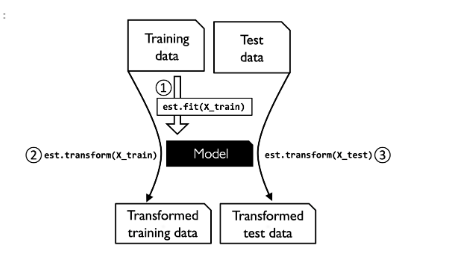
Ucznie Nadzorowane 
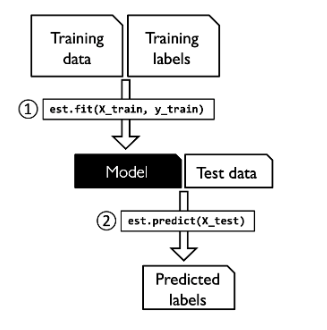

### Przetwarzanie danych ktegorialnych 
Definując takie dane musimy rozróznić na nominalne i porządkowe.
#### Nominalne - bez zdefiniowanje kolejności i porządku np. kolor
#### Porządkowe - zdefiniowana kolejność. S< M <L <XL

In [12]:
import pandas as pd


In [13]:
df_ = pd.DataFrame([
    ["zielony","M",10.1,"klasa2"],
    ["Czerwony","L",13.5,"klasa1"],
    ["Niebieski","XL",15.3,"klasa2"],
    ["Czarny","S",9.8,"klasa3"]
])
df_.columns=["kolor","rozmiar","cena","Etykieta"]
df_

,kolor,rozmiar,cena,Etykieta
0,zielony,M,10.1,klasa2
1,Czerwony,L,13.5,klasa1
2,Niebieski,XL,15.3,klasa2
3,Czarny,S,9.8,klasa3


In [14]:
# mapowanie cech 
size_maping = {
    "XL":4,
    "L":3,
    "M":2,
    "S":1,
}

df_["rozmiar"] = df_["rozmiar"].map(size_maping)
df_

,kolor,rozmiar,cena,Etykieta
0,zielony,2,10.1,klasa2
1,Czerwony,3,13.5,klasa1
2,Niebieski,4,15.3,klasa2
3,Czarny,1,9.8,klasa3


In [15]:
# odwrotne mapowanie, jeśli bedzie trzeba
inv_size_mapping = {v: k for k, v in size_maping.items()}
df_["rozmiar"] = df_["rozmiar"].map(inv_size_mapping)
df_

,kolor,rozmiar,cena,Etykieta
0,zielony,M,10.1,klasa2
1,Czerwony,L,13.5,klasa1
2,Niebieski,XL,15.3,klasa2
3,Czarny,S,9.8,klasa3


In [16]:
df_["rozmiar"] = df_["rozmiar"].map(size_maping)
df_

,kolor,rozmiar,cena,Etykieta
0,zielony,2,10.1,klasa2
1,Czerwony,3,13.5,klasa1
2,Niebieski,4,15.3,klasa2
3,Czarny,1,9.8,klasa3


### Kodowanie etykiet klas
Etykiety nie są porządkowe !

In [17]:
import numpy as np

In [18]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_["Etykieta"]))}
class_mapping

{'klasa1': 0, 'klasa2': 1, 'klasa3': 2}

In [19]:
df_["Etykieta"] = df_["Etykieta"].map(class_mapping)
df_

,kolor,rozmiar,cena,Etykieta
0,zielony,2,10.1,1
1,Czerwony,3,13.5,0
2,Niebieski,4,15.3,1
3,Czarny,1,9.8,2


In [20]:
inv_size_mapping_ = {v: k for k, v in class_mapping.items()}
df_["Etykieta"] = df_["Etykieta"].map(inv_size_mapping_)
df_

,kolor,rozmiar,cena,Etykieta
0,zielony,2,10.1,klasa2
1,Czerwony,3,13.5,klasa1
2,Niebieski,4,15.3,klasa2
3,Czarny,1,9.8,klasa3


In [21]:
# odwaracanie etykie robi sie tak samo jak wyżej 

In [22]:
## to samo z sklieran
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y = label_enc.fit_transform(df_["Etykieta"].values)
y

array([1, 0, 1, 2])

In [23]:
label_enc.inverse_transform(y)

array(['klasa2', 'klasa1', 'klasa2', 'klasa3'], dtype=object)

###  One Hot Encoder

In [24]:
X = df_[["kolor","rozmiar","cena"]].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X
## etykiety myla sie z innymi cechami i robimy dane kategoryzujące z nominalnych 

array([[3, 2, 10.1],
       [1, 3, 13.5],
       [2, 4, 15.3],
       [0, 1, 9.8]], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohenc = OneHotEncoder()
X_ = ohenc.fit_transform(X[:,0].reshape(-1,1)).toarray()
X_

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

### Przekształcanie wybranej kolumny 

In [26]:
from sklearn.compose import ColumnTransformer

In [27]:
col_trf = ColumnTransformer([
    ("onehot", OneHotEncoder(), [0]), # nazwa, transformator, kolumna
    ("nothig", "passthrough", [1,2])
])
col_trf.fit_transform(X).astype("float32")

array([[ 0. ,  0. ,  0. ,  1. ,  2. , 10.1],
       [ 0. ,  1. ,  0. ,  0. ,  3. , 13.5],
       [ 0. ,  0. ,  1. ,  0. ,  4. , 15.3],
       [ 1. ,  0. ,  0. ,  0. ,  1. ,  9.8]], dtype=float32)

In [28]:
# w pandasie
pd.get_dummies(df_[["kolor","rozmiar","cena"]])

,rozmiar,cena,kolor_Czarny,kolor_Czerwony,kolor_Niebieski,kolor_zielony
0,2,10.1,0,0,0,1
1,3,13.5,0,1,0,0
2,4,15.3,0,0,1,0
3,1,9.8,1,0,0,0


#### Kiedy cech sa ze sobą sciśle skolerowane moża usunąć jedna kolunę jeśli obilczenia sa zbyt kosztowne
Niebieski = 0, zieolny =0,  czerwony = 0, dlaego wiadomo że to czarny kolor 

In [29]:
pd.get_dummies(df_[["kolor","rozmiar","cena"]], drop_first=True)

,rozmiar,cena,kolor_Czerwony,kolor_Niebieski,kolor_zielony
0,2,10.1,0,0,1
1,3,13.5,1,0,0
2,4,15.3,0,1,0
3,1,9.8,0,0,0


In [30]:
# w one hot
one_hot = OneHotEncoder(categories="auto", drop="first")
col_trf = ColumnTransformer([
    ("onehot", one_hot, [0]), # nazwa, transformator, kolumna
    ("nothig", "passthrough", [1,2])
])
col_trf.fit_transform(X).astype("float32")

array([[ 0. ,  0. ,  1. ,  2. , 10.1],
       [ 1. ,  0. ,  0. ,  3. , 13.5],
       [ 0. ,  1. ,  0. ,  4. , 15.3],
       [ 0. ,  0. ,  0. ,  1. ,  9.8]], dtype=float32)

###  Rozdzielanie zestawów na treningowy i testowy
##### Dataset Wine, zawierający 178 przykładów i 13 cech (178 wierszy i 13 kolumn)
- Przy małych datasetach proporcje mogą być 8:2, 7:3, a przy bardzo małych nawet 6:4
- Przy dużych 9:1 a przy bardzo dużych 99:01

In [224]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/"
                     "ml/machine-learning-databases/"
                     "wine/wine.data",header=None)

df_wine.columns =["Etykieta klasy", "Alkohol","Kwas jabłkowy", "Popiół", "Zasadowość popiołu",
                 "Magnez","Całkowita zawartość fenoli", "Flawonoidy",
                 "Fenole nieflawoidowe", "Proantocjaniny", "Intesywność koloru", "Odcień",
                 "Transmiatncja 280/315 nm","Prolina"]

print("lableki klas", np.unique(df_wine["Etykieta klasy"]))

lableki klas [1 2 3]


In [225]:
df_wine

,Etykieta klasy,Alkohol,Kwas jabłkowy,Popiół,Zasadowość popiołu,Magnez,Całkowita zawartość fenoli,Flawonoidy,Fenole nieflawoidowe,Proantocjaniny,Intesywność koloru,Odcień,Transmiatncja 280/315 nm,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [33]:
 df_wine.iloc[:,0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
data, labels = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(data,labels, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    stratify=labels)# takie same proporcje
                                                    

### Skalowanie danych
Normalizacja - sprowadzanie cech do zakresu 0-1
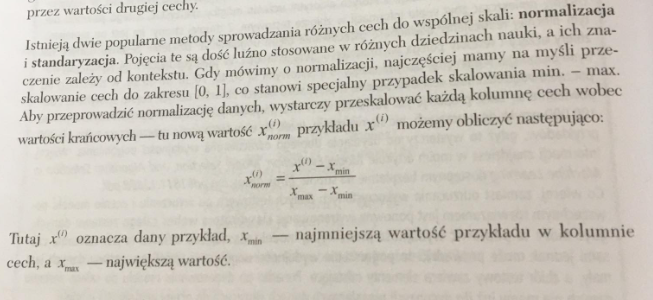

In [36]:
from sklearn.preprocessing import MinMaxScaler
maxmin = MinMaxScaler()
X_train_norm = maxmin.fit_transform(X_train)
X_test_norm = maxmin.fit_transform(X_test)

Standaryzacja - jest bardziej korzystna dla uczenia, ustawia średnią na poziomie 0 i odchylenie sdt na poziomie 1 
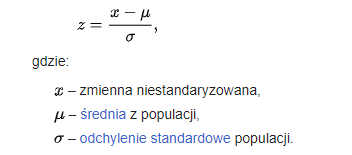
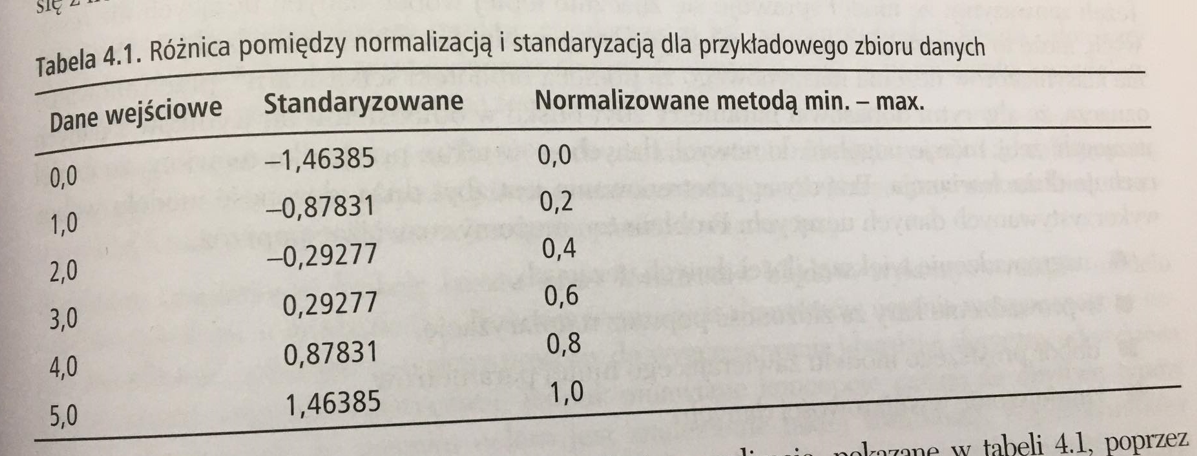

In [245]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

#### Do małych zbiorów, gdzie jest dużo odstających wartości bardzo przydatny jest RobustScaler 

### Reg. L2 w geometrycznej interpretacji
Im wiekszy zakres regularyzacji tym wartosci f. kosztu zbliżają sie do zera 
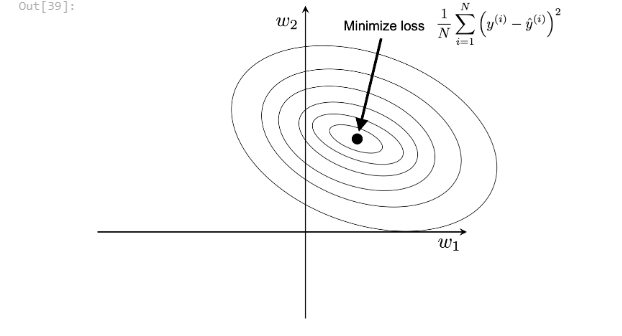
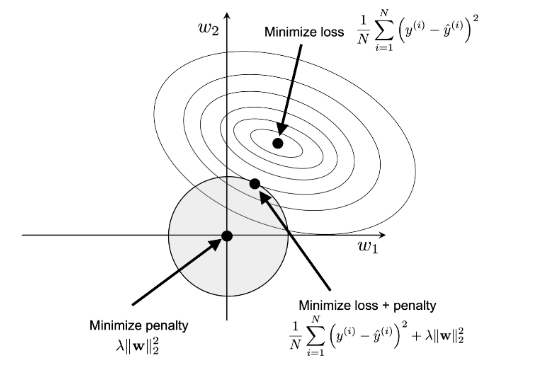

### Reg. L1 
W regularyzacji L1 pkt. ptrzecięcia f. kosztu z warościami wypada zazwyczaj na osi. Generuje rzadkie wektory cech a wiekszość wag jest równa 0. Przydajw sie do wielowymiarowych danych o dużej liczbie niewaznych cech.
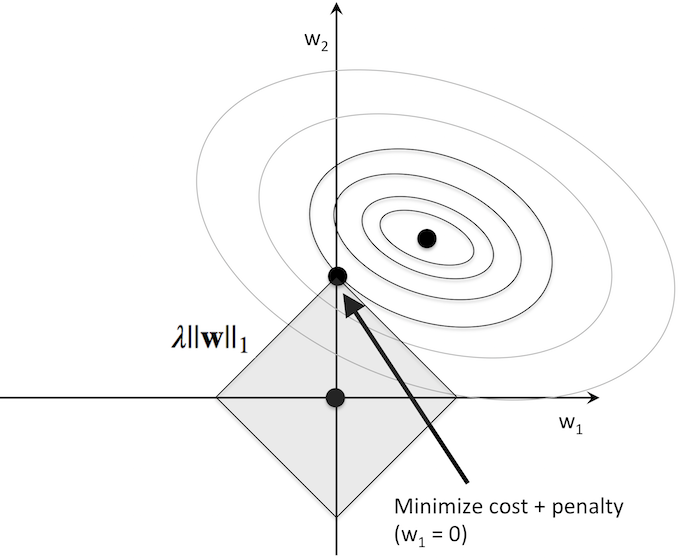

In [38]:
from sklearn.linear_model import LogisticRegression


In [40]:
# trzeba zastosowac inny solver bo nie wszyskie obsługują funkcje straty dla L1
lr = LogisticRegression(penalty="l1", C=1.0 ,solver="liblinear", multi_class="ovr")
lr.fit(X_train_std, y_train)
print("dokładność dla danych testowych:", lr.score(X_test_std, y_test))


dokładność : 1.0


In [41]:
#warunki pkt. przecięcia granicy L1 i wartości wag 
lr.intercept_

array([-1.26336584, -1.21621261, -2.36986556])

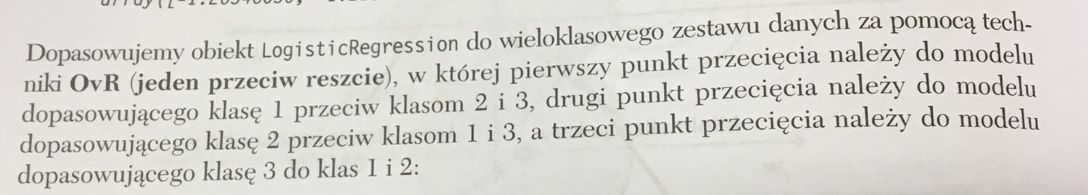

In [42]:
lr.coef_

array([[ 1.24564868,  0.18064334,  0.74379681, -1.16145071,  0.        ,
         0.        ,  1.16981678,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54762404,  2.51047586],
       [-1.53668955, -0.3872106 , -0.99442731,  0.36423933, -0.05961274,
         0.        ,  0.66746841,  0.        ,  0.        , -1.93442551,
         1.234848  ,  0.        , -2.23283739],
       [ 0.13552473,  0.16855014,  0.35730651,  0.        ,  0.        ,
         0.        , -2.4376035 ,  0.        ,  0.        ,  1.56384201,
        -0.81928857, -0.49263457,  0.        ]])

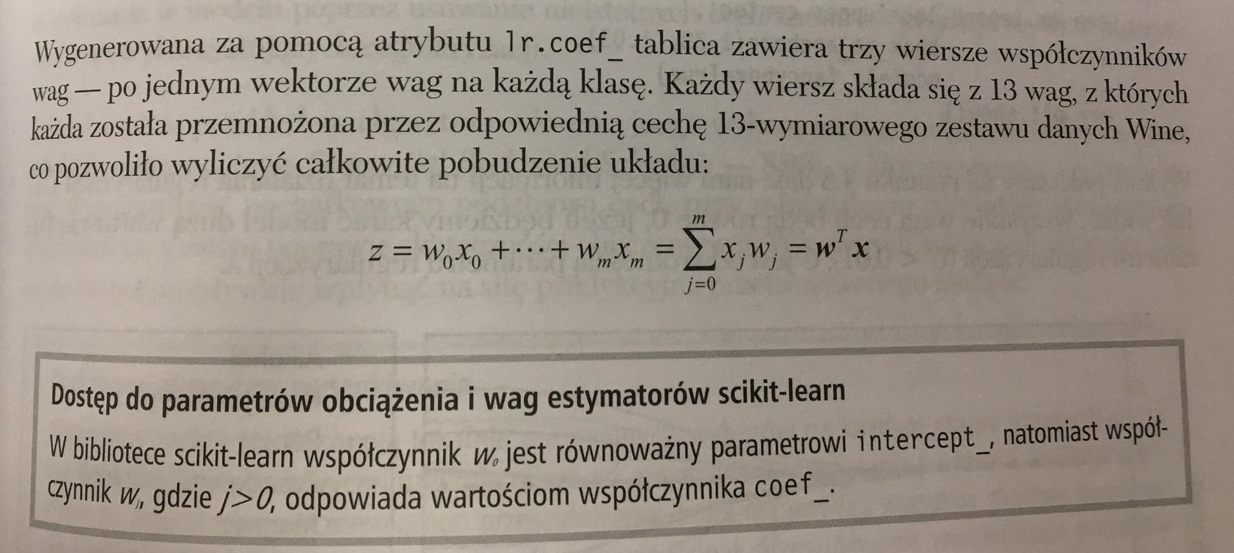

- [w0 * x0 + w0 * x1 + w0 * x2 ...+ w0 * x13]
- [w1 * x0 + w1 * x1 + w1 * x2 ...+ w1 * x13]
- [w2 * x0 + w2 * x1 + w2 * x2 ...+ w2 * x13]

#### model odporny na wpływ nieistotnych cech. Jednak wektory wag nie sa całkowicie rzadkie bo maja wiecej wartośc niezerowych niż zerowych. Można to zmienić za pomocą parametru C.

In [53]:
# model z większym obciążeniem (niedotrenowanie)
lr_ = LogisticRegression(penalty="l1", C=0.05 ,solver="liblinear", multi_class="ovr")
lr_.fit(X_train_std, y_train)
print("dokładność dla danych testowych:", lr_.score(X_test_std, y_test))


dokładność dla danych testowych: 0.9814814814814815


In [54]:
lr_.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.19669072,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.09174445],
       [-0.5773693 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.45960232,
         0.        ,  0.        , -0.06803598],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.22773856,  0.        ,  0.        ,  0.02332747,
        -0.19162275, -0.58558007,  0.        ]])

In [57]:
# model z wiekszą warjancją (overfiting)
lr_w = LogisticRegression(penalty="l1", C=1000 ,solver="liblinear", multi_class="ovr")
lr_w.fit(X_train_std, y_train)
print("dokładność dla danych testowych:", lr_w.score(X_test_std, y_test))
lr_w.coef_

dokładność dla danych testowych: 1.0


array([[  7.40284219,   1.88988242,   4.22504562,  -6.38367028,
          0.80314034,   0.        ,   5.31988417,   0.        ,
          0.65944774,  -1.39171499,  -1.36415943,   3.31729577,
          8.14076583],
       [ -5.89814709,  -3.02298475,  -6.92020348,   3.79756348,
         -0.84461055,   0.        ,   4.94859041,   2.77886036,
          0.        , -19.43736776,   5.23881973,   0.41728677,
        -16.0595571 ],
       [  4.56928455,   0.5958881 ,   3.63303449,   0.        ,
          0.04004822,   0.49635996,  -9.48052146,  -2.04662315,
         -1.54598729,   8.3449075 ,  -6.16819495,  -2.95694547,
          0.65853943]])

In [58]:
# wykres różnych sił regularyzacji - wag dal róznych cech 
import matplotlib.pyplot as plt


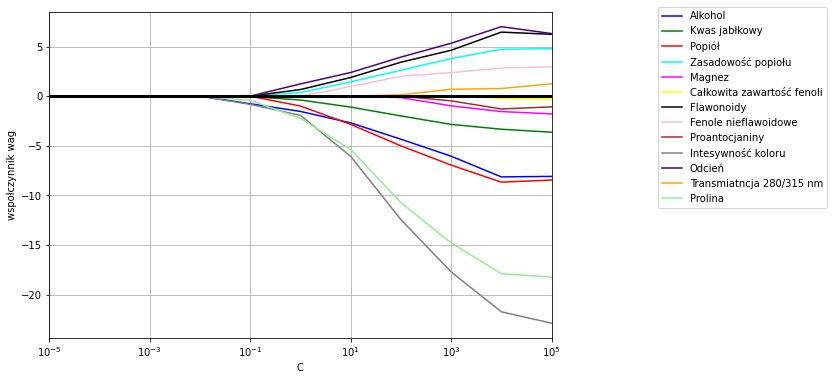

In [79]:
fig = plt.figure(figsize=(9,6))
ax = plt.subplot(111) # dodawanie osi
colors = ["blue","green","red","cyan","magenta","yellow","black","pink","brown","gray","indigo",
         "orange","lightgreen"]
weights, params = [],[]
for c in np.arange(-4.,6.):
    lr = LogisticRegression(penalty="l1", C=10.**c, solver="liblinear", multi_class="ovr",
                           random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    param = 10**c
    params.append(param)

weights = np.array(weights)
for column, color, in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column+1],
            color=color)
plt.axhline(0., color="black", linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel("wspołczynnik wag")
plt.xlabel("C")
plt.xscale("log")
plt.legend(loc="upper left")
plt.grid()
ax.legend(loc="upper center", bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

#### im mniejszy zakres C tym wagi coraz mnijesze, przy c=10^5 model overfituje

### Algorytm sekwencyjnego wyboru cech (redukcja wymiarowości)
sa dwa rodzaje redukcji:
- wybór cech - wyzaczenie podzbiorów cech pierwotnych (istotnych)
- odkrywanie cech - wyznaczanie nowych podzbiorów cech z już istniejących (feature eenginering)
##### Algorytmy sekwencyjne SBS służą do ograniczania wymiarów cech (usuwają nieistotne cechy i szum)
##### SBS w każdej iteracji sprawdza jak usunięcie cech działa na przewidywania modelu i usuwa cech które mają najmnijeszy wpływ 
kroki SBS:
 - inicjacja parametru k = d gdzie d to pierwotna ilość wymiarów zestawu danych Xd 
 - określenie cech x maksymalizująca f.kryterialną(opowiedzialna za wskazaanie najmniej istotnej cechy) x = argmax J(Xk - x), x należy do Xk
 - usunięcie x ze zbioru cech 
 - zakończenie jeśli k jest równe wymaganych cech 

In [111]:
# IMPLEMENTACJA 
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, 
                  k_features, 
                  scoring=accuracy_score, 
                  test_size=0.25, 
                random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features # liczba pożądanych cech 
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X,y):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=self.test_size,
                                                           random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        
        self.scores_ = [score]
        
        while dim> self.k_features:
            scores = []
            subsets = []
            # ocenianie cech i redukowanie niepożądanych 
            for p in combinations(self.indices_, r =dim-1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best] #indeksy najlepszych kolumn
            self.subsets_.append(self.indices_)
            dim -=1
            
            self.scores_.append(scores[best]) # puktacja dokładności najlepszego podzbioru 
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, 
                          X_test, y_test, indices):
        
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [109]:
# żeby skożystac trzeba określić algortym wszukujący cechy 
from sklearn.neighbors import KNeighborsClassifier

In [266]:
knn = KNeighborsClassifier(n_neighbors=5) 
sbs = SBS(knn, k_features=1) # ilość porządanych cech
sbs.fit(X_train_std, y_train)

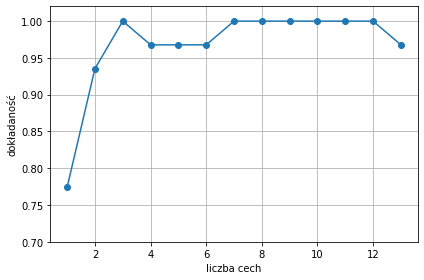

In [114]:
### knn wobez zb. walidacyjnego
k_feat =[len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker="o")
plt.ylim([0.7,1.02])
plt.ylabel("dokładaność")
plt.xlabel("liczba cech")
plt.grid()
plt.tight_layout()
plt.show()

#### im mniejsza ilość cech tym lepsza dłokładność algortymu, przy redukcji 3 wymiarów 100% dokładności 

In [293]:
# sprawdzanie dokładaności dla najlepszego wyniku (3 wymiary)
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alkohol', 'Kwas jabłkowy', 'Transmiatncja 280/315 nm'], dtype='object')


In [294]:
# algorytm wyuczony na całym datasecie
knn.fit(X_train_std, y_train)
print("dokładaność dla danych uczących", knn.score(X_train_std, y_train))
print("dokładaność dla danych testowych", knn.score(X_test_std, y_test))

dokładaność dla danych uczących 0.967741935483871
dokładaność dla danych testowych 0.9814814814814815


In [295]:
# algorytm wyucznoy na ograniczonym datasecie 
knn.fit(X_train_std[:, k3], y_train)
print("dokładaność dla danych uczących", knn.score(X_train_std[:,k3], y_train))
print("dokładaność dla danych testowych", knn.score(X_test_std[:,k3], y_test))

dokładaność dla danych uczących 0.9516129032258065
dokładaność dla danych testowych 0.9259259259259259


### Nie dużo obniżone wyniki świadaczą o tym że cechy nie były bardzo istotne 

In [115]:
# za pomoca biblioteki
from sklearn.feature_selection import SequentialFeatureSelector

In [162]:
knn_ = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(estimator=knn_, n_features_to_select=1)# zbiór ogranionych cech 
sfs.fit(X_train_std, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=1)

In [158]:
sfs.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_features_to_select': 2,
 'n_jobs': None,
 'scoring': None,
 'tol': None}

In [163]:
sfs.n_features_in_ # początkowa liczba wymiarów

13

In [164]:
sfs.n_features_to_select_ # ograniczona liczba wymiarów

1

In [165]:
sfs.get_feature_names_out() # nazyw pozostałych istotnych wymiarów 

array(['x6'], dtype=object)

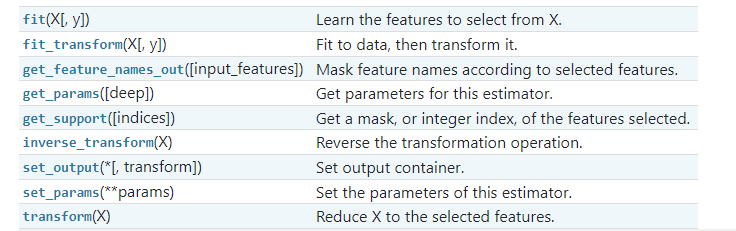
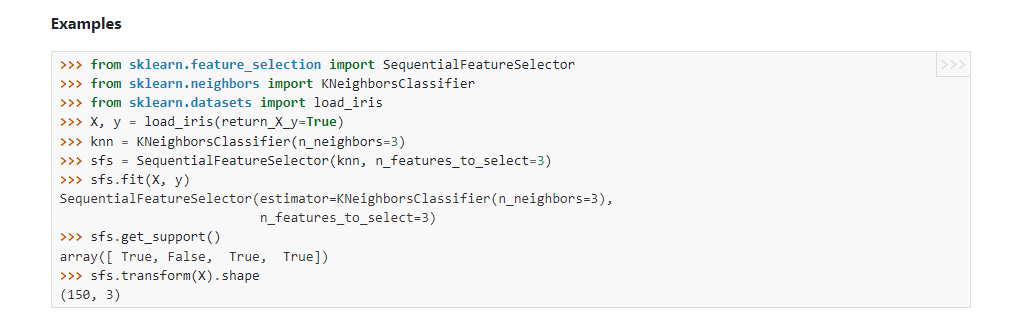

In [172]:

knn_ = KNeighborsClassifier(n_neighbors=5)
sfs_ = SequentialFeatureSelector(estimator=knn_)
sfs_.fit(X_train_std, y_train)
print(sfs_.get_feature_names_out(),
     sfs_.n_features_to_select_,
     sfs_.n_features_in_)

C:\Users\Grzegorz Mróz\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\feature_selection\_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


['x0' 'x4' 'x6' 'x9' 'x10' 'x12'] 6 13


In [173]:
sfs_.get_support()

array([ True, False, False, False,  True, False,  True, False, False,
        True,  True, False,  True])

In [176]:
# redukowanie zbioru 
reduced = sfs_.transform(X_train_std)
reduced.shape

(124, 6)

In [230]:
delete = sfs_.get_support()
delete

array([ True, False, False, False,  True, False,  True, False, False,
        True,  True, False,  True])

In [203]:
list_column = df_wine.columns
list_column

Index(['Etykieta klasy', 'Alkohol', 'Kwas jabłkowy', 'Popiół',
       'Zasadowość popiołu', 'Magnez', 'Całkowita zawartość fenoli',
       'Flawonoidy', 'Fenole nieflawoidowe', 'Proantocjaniny',
       'Intesywność koloru', 'Odcień', 'Transmiatncja 280/315 nm', 'Prolina'],
      dtype='object')

In [219]:
for x,y in zip(delete, list_column):
    print(x,y)

True Etykieta klasy
False Alkohol
False Kwas jabłkowy
False Popiół
True Zasadowość popiołu
False Magnez
True Całkowita zawartość fenoli
False Flawonoidy
False Fenole nieflawoidowe
True Proantocjaniny
True Intesywność koloru
False Odcień
True Transmiatncja 280/315 nm


In [222]:
df_wine_ = df_wine.drop(labels=["Alkohol","Kwas jabłkowy","Popiół","Magnez","Flawonoidy",
                    "Fenole nieflawoidowe","Odcień"], axis=1)

In [223]:
df_wine_

,Etykieta klasy,Zasadowość popiołu,Całkowita zawartość fenoli,Proantocjaniny,Intesywność koloru,Transmiatncja 280/315 nm,Prolina
0,1,15.6,2.80,2.29,5.64,3.92,1065
1,1,11.2,2.65,1.28,4.38,3.40,1050
2,1,18.6,2.80,2.81,5.68,3.17,1185
3,1,16.8,3.85,2.18,7.80,3.45,1480
4,1,21.0,2.80,1.82,4.32,2.93,735
...,...,...,...,...,...,...,...
173,3,20.5,1.68,1.06,7.70,1.74,740
174,3,23.0,1.80,1.41,7.30,1.56,750
175,3,20.0,1.59,1.35,10.20,1.56,835
176,3,20.0,1.65,1.46,9.30,1.62,840


In [242]:
label_= df_wine_.iloc[:,0].values
data_=df_wine_.iloc[:,1:].values

In [243]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(data_, label_, test_size=0.2, random_state=0,
                                                       stratify=label_)

In [279]:
X_train_std_ = std.fit_transform(X_train_)
X_test_std_ = std.fit_transform(X_test_)


In [292]:
knn.fit(X_train_std_, y_train_)
print("dokładaność dla danych uczących", knn.score(X_train_std_, y_train_))
print("dokładaność dla danych testowych", knn.score(X_test_std_, y_test_))

dokładaność dla danych uczących 0.9647887323943662
dokładaność dla danych testowych 0.9722222222222222


In [296]:
# dosyć podobne wyniki jak do zimplementowanje klasy 

### Ocenianie istotności cech 
za pomocą lasów losowych, mierzymy poziom zanieczyszceń danych i tam gdzie jest najwięszy usuwamy cechy

In [250]:
# w laslach losowowych nie trzba skalowac cech 
from sklearn.ensemble import RandomForestClassifier

In [251]:
feat_label = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1) # 500 drzew 
forest.fit(X_train, y_train)
importance = forest.feature_importances_ # najważniejsze chechy 

In [252]:
indx = np.argsort(importance)[::-1]

 1) Prolina                        0.185453
 2) Flawonoidy                     0.174751
 3) Intesywność koloru             0.143920
 4) Transmiatncja 280/315 nm       0.136162
 5) Alkohol                        0.118529
 6) Odcień                         0.058739
 7) Całkowita zawartość fenoli     0.050872
 8) Magnez                         0.031357
 9) Kwas jabłkowy                  0.025648
10) Proantocjaniny                 0.025570
11) Zasadowość popiołu             0.022366
12) Fenole nieflawoidowe           0.013354
13) Popiół                         0.013279


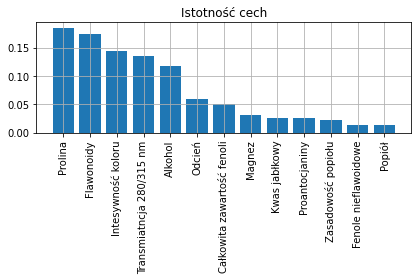

In [259]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_label[indx[f]], 
                            importance[indx[f]]))

plt.title("Istotność cech")
plt.bar(range(X_train.shape[1]),importance[indx], align="center") # wykres słupkowy 
plt.xticks(range(X_train.shape[1]), feat_label[indx], rotation=90) # labelki na osi #
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.grid()
plt.show()

#### W tym przypadku pierwsze 5 cech jest najbardziej istotnych. UWAGA: Jeśli jakieś cech są ze sobą ściśle powiązane to algortym lasu może dać zawyżony wynik jedej z cech !!

In [260]:
## Za pomoća bilblioteki 
from sklearn.feature_selection import SelectFromModel

In [261]:
sfm =SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

In [263]:
print("liczba cehc spełniających kryterium", X_selected.shape[1])

liczba cehc spełniających kryterium 5


In [264]:
for f in range(X_selected.shape[1]):
     print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_label[indx[f]], 
                            importance[indx[f]]))
    

 1) Prolina                        0.185453
 2) Flawonoidy                     0.174751
 3) Intesywność koloru             0.143920
 4) Transmiatncja 280/315 nm       0.136162
 5) Alkohol                        0.118529
